# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks 

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective. 


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [4]:
# Import the packages that we will be using

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [5]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = ""

else:
    # Define path del proyecto
    Ruta            = 'datasets'

In [6]:
# url string that hosts our .csv file

url = '/cartwheel/cartwheel.csv'

# Read the .csv file and store it as a pandas Data Frame

df = pd.read_csv(Ruta+url)


# Exploring the content of the data set

Get a general 'feel' of the data


In [7]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56.0,F,1,Y,1,62.0,61.0,79,Y,1.0,7
1,2,26.0,F,1,Y,1,62.0,60.0,70,Y,1.0,8
2,3,33.0,F,1,Y,1,66.0,64.0,85,Y,1.0,7
3,4,39.0,F,1,N,0,64.0,63.0,87,Y,1.0,10
4,5,27.0,M,2,N,0,73.0,75.0,72,N,0.0,4


In [8]:
df.shape

(52, 12)

In [9]:
df.describe()

,ID,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
count,52.000000,51.000000,52.000000,52.000000,51.000000,51.000000,52.000000,51.000000,52.000000
mean,26.500000,28.411765,1.500000,0.500000,68.971569,67.313725,85.576923,0.843137,7.173077
std,15.154757,5.755611,0.504878,0.504878,5.303812,5.624021,14.353173,0.367290,2.211566
min,1.000000,22.000000,1.000000,0.000000,61.500000,57.500000,63.000000,0.000000,2.000000
25%,13.750000,25.000000,1.000000,0.000000,64.500000,63.000000,72.000000,1.000000,6.000000
50%,26.500000,27.000000,1.500000,0.500000,69.000000,66.000000,85.000000,1.000000,8.000000
75%,39.250000,30.000000,2.000000,1.000000,73.000000,72.000000,96.500000,1.000000,9.000000
max,52.000000,56.000000,2.000000,1.000000,79.500000,76.000000,115.000000,1.000000,10.000000


In [10]:
vars = ["Age","GenderGroup","GlassesGroup","Height","Wingspan","CWDistance","CompleteGroup","Score"]
df2 = df[vars].dropna()

# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [12]:
# Number of times that each distinct value of a variable occurs in a data set

count = df['Age'].value_counts()
print(count)
count = df['Gender'].value_counts()
print(count)
count = df['GenderGroup'].value_counts()
print(count)
count = df['GlassesGroup'].value_counts()
print(count)
count = df['Height'].value_counts()
print(count)
count = df['Wingspan'].value_counts()
print(count)
count = df['CWDistance'].value_counts()
print(count)
count = df['Complete'].value_counts()
print(count)
count = df['CompleteGroup'].value_counts()
print(count)
count = df['Score'].value_counts()
print(count)

26.0    7
27.0    7
24.0    5
28.0    5
23.0    5
30.0    4
25.0    4
33.0    3
39.0    2
29.0    2
31.0    2
38.0    2
56.0    1
22.0    1
32.0    1
Name: Age, dtype: int64
F    26
M    26
Name: Gender, dtype: int64
1    26
2    26
Name: GenderGroup, dtype: int64
1    26
0    26
Name: GlassesGroup, dtype: int64
61.50    4
65.00    4
62.00    3
64.00    3
73.00    3
75.00    3
66.00    3
71.00    3
68.00    2
70.00    2
69.00    2
63.00    2
69.50    2
62.75    1
73.50    1
77.80    1
79.50    1
78.00    1
72.00    1
72.50    1
67.80    1
70.40    1
77.00    1
65.30    1
76.00    1
78.40    1
74.00    1
74.60    1
Name: Height, dtype: int64
66.0    5
63.0    4
75.0    4
71.0    4
72.0    4
60.0    4
64.0    3
76.0    3
61.0    2
74.0    2
59.5    2
73.0    2
64.5    2
62.0    2
70.0    2
68.0    1
67.0    1
58.0    1
69.0    1
57.5    1
71.5    1
Name: Wingspan, dtype: int64
72     5
92     4
85     3
66     3
79     2
96     2
82     2
101    2
90     2
115    2
74     2
98     2
107 

In [13]:
# Proportion of each distinct value of a variable occurs in a data set

proportion = df['Age'].value_counts(normalize=True)
print(proportion)
proportion = df['Gender'].value_counts(normalize=True)
print(proportion)
proportion = df['GenderGroup'].value_counts(normalize=True)
print(proportion)
proportion = df['GlassesGroup'].value_counts(normalize=True)
print(proportion)
proportion = df['Height'].value_counts(normalize=True)
print(proportion)
proportion = df['Wingspan'].value_counts(normalize=True)
print(proportion)
proportion = df['CWDistance'].value_counts(normalize=True)
print(proportion)
proportion = df['Complete'].value_counts(normalize=True)
print(proportion)
proportion = df['CompleteGroup'].value_counts(normalize=True)
print(proportion)
proportion = df['Score'].value_counts(normalize=True)
print(proportion)

26.0    0.137255
27.0    0.137255
24.0    0.098039
28.0    0.098039
23.0    0.098039
30.0    0.078431
25.0    0.078431
33.0    0.058824
39.0    0.039216
29.0    0.039216
31.0    0.039216
38.0    0.039216
56.0    0.019608
22.0    0.019608
32.0    0.019608
Name: Age, dtype: float64
F    0.5
M    0.5
Name: Gender, dtype: float64
1    0.5
2    0.5
Name: GenderGroup, dtype: float64
1    0.5
0    0.5
Name: GlassesGroup, dtype: float64
61.50    0.078431
65.00    0.078431
62.00    0.058824
64.00    0.058824
73.00    0.058824
75.00    0.058824
66.00    0.058824
71.00    0.058824
68.00    0.039216
70.00    0.039216
69.00    0.039216
63.00    0.039216
69.50    0.039216
62.75    0.019608
73.50    0.019608
77.80    0.019608
79.50    0.019608
78.00    0.019608
72.00    0.019608
72.50    0.019608
67.80    0.019608
70.40    0.019608
77.00    0.019608
65.30    0.019608
76.00    0.019608
78.40    0.019608
74.00    0.019608
74.60    0.019608
Name: Height, dtype: float64
66.0    0.098039
63.0    0.078431


Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [18]:
# Total number of observations

obs = df.count()
print("Number of observations: ", obs)

# Total number of null observations

obsNULL = df.isnull().sum()
print("Number of null observations: ", obsNULL)

# Total number of counts (excluding missing values)

counts = obs-obsNULL
print("Total number of counts: ", counts)


Number of observations:  ID               52
Age              51
Gender           52
GenderGroup      52
Glasses          52
GlassesGroup     52
Height           51
Wingspan         51
CWDistance       52
Complete         52
CompleteGroup    51
Score            52
dtype: int64
Number of null observations:  ID               0
Age              1
Gender           0
GenderGroup      0
Glasses          0
GlassesGroup     0
Height           1
Wingspan         1
CWDistance       0
Complete         0
CompleteGroup    1
Score            0
dtype: int64
Total number of counts:  ID               52
Age              50
Gender           52
GenderGroup      52
Glasses          52
GlassesGroup     52
Height           50
Wingspan         50
CWDistance       52
Complete         52
CompleteGroup    50
Score            52
dtype: int64


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

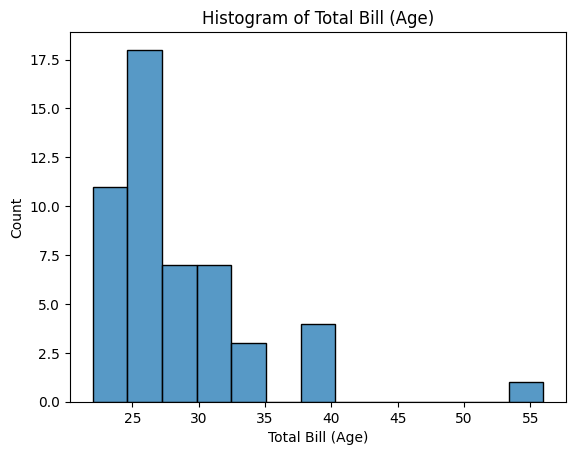

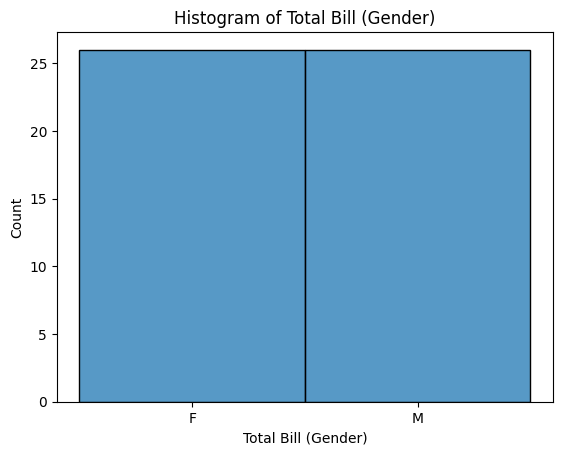

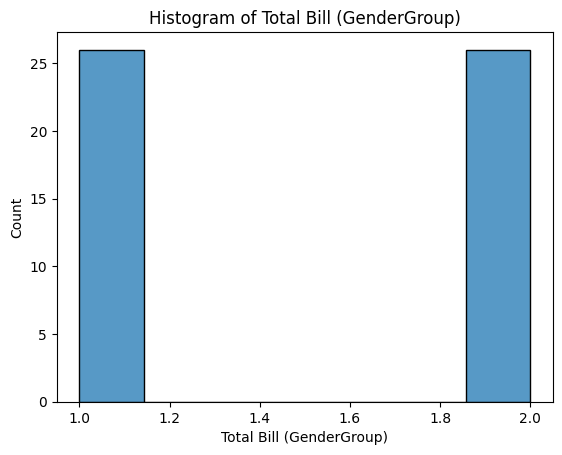

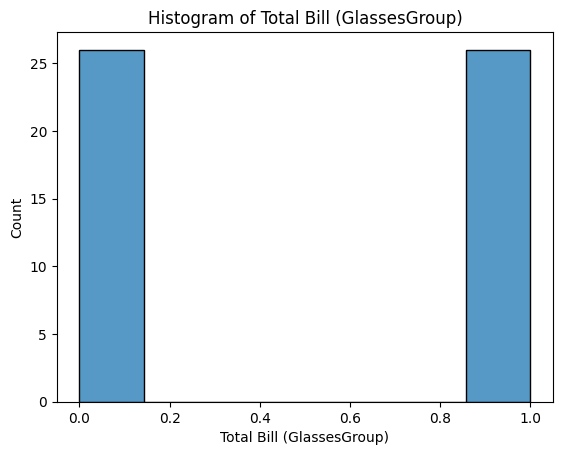

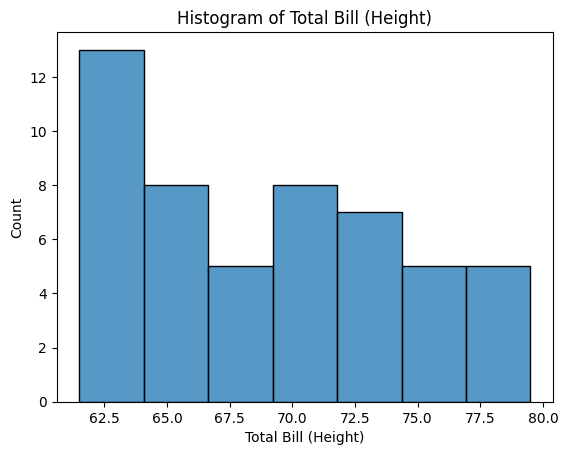

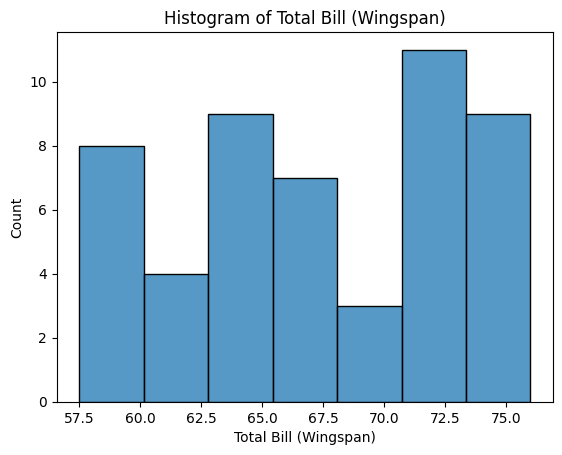

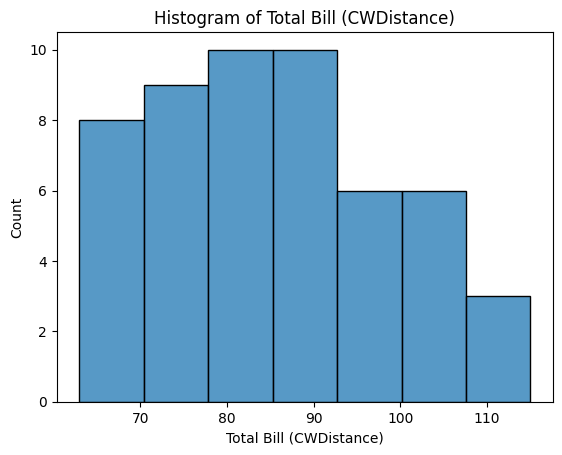

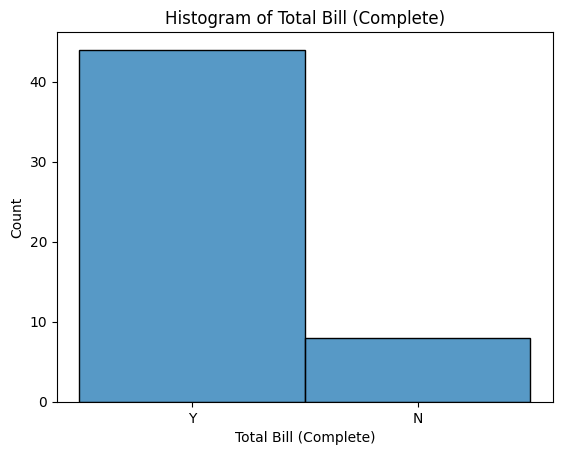

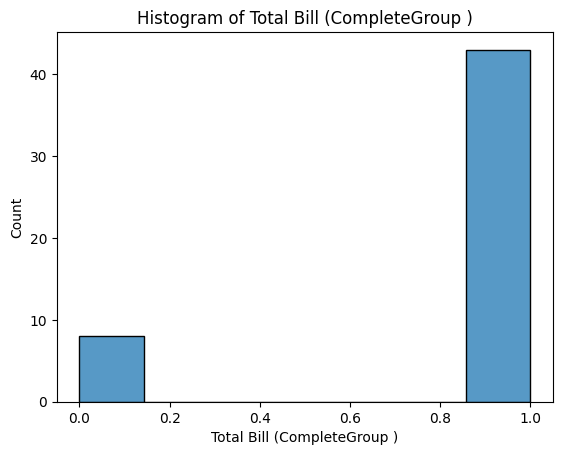

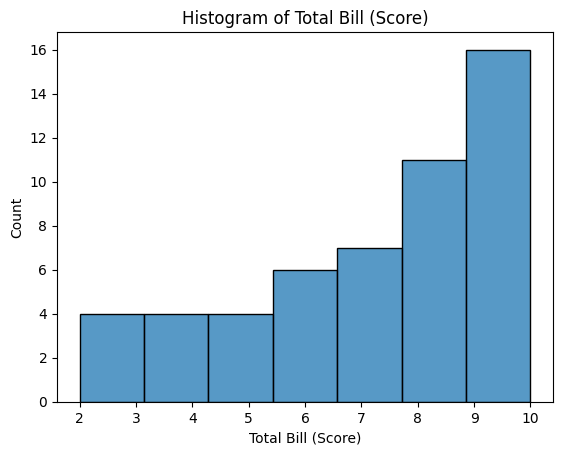

In [23]:
# Plot histogram of the total bill only

sns.histplot(data=df, x="Age")
plt.title("Histogram of Total Bill (Age)")
plt.xlabel("Total Bill (Age)")
plt.ylabel("Count")
plt.show()

sns.histplot(data=df, x="Gender")
plt.title("Histogram of Total Bill (Gender)")
plt.xlabel("Total Bill (Gender)")
plt.ylabel("Count")
plt.show()

sns.histplot(data=df, x="GenderGroup")
plt.title("Histogram of Total Bill (GenderGroup)")
plt.xlabel("Total Bill (GenderGroup)")
plt.ylabel("Count")
plt.show()

sns.histplot(data=df, x="GlassesGroup")
plt.title("Histogram of Total Bill (GlassesGroup)")
plt.xlabel("Total Bill (GlassesGroup)")
plt.ylabel("Count")
plt.show()

sns.histplot(data=df, x="Height")
plt.title("Histogram of Total Bill (Height)")
plt.xlabel("Total Bill (Height)")
plt.ylabel("Count")
plt.show()

sns.histplot(data=df, x="Wingspan")
plt.title("Histogram of Total Bill (Wingspan)")
plt.xlabel("Total Bill (Wingspan)")
plt.ylabel("Count")
plt.show()

sns.histplot(data=df, x="CWDistance")
plt.title("Histogram of Total Bill (CWDistance)")
plt.xlabel("Total Bill (CWDistance)")
plt.ylabel("Count")
plt.show()

sns.histplot(data=df, x="Complete")
plt.title("Histogram of Total Bill (Complete)")
plt.xlabel("Total Bill (Complete)")
plt.ylabel("Count")
plt.show()

sns.histplot(data=df, x="CompleteGroup")
plt.title("Histogram of Total Bill (CompleteGroup )")
plt.xlabel("Total Bill (CompleteGroup )")
plt.ylabel("Count")
plt.show()

sns.histplot(data=df, x="Score")
plt.title("Histogram of Total Bill (Score)")
plt.xlabel("Total Bill (Score)")
plt.ylabel("Count")
plt.show()




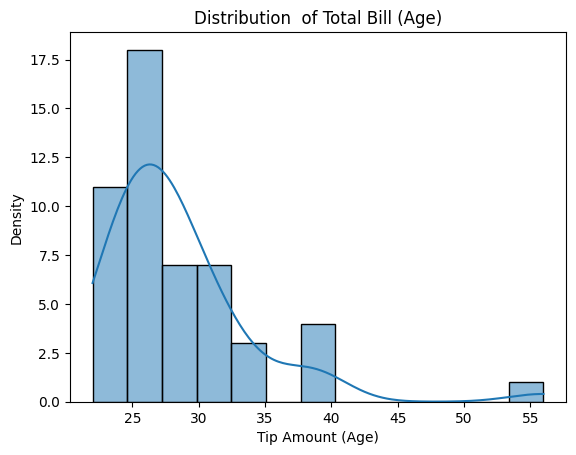

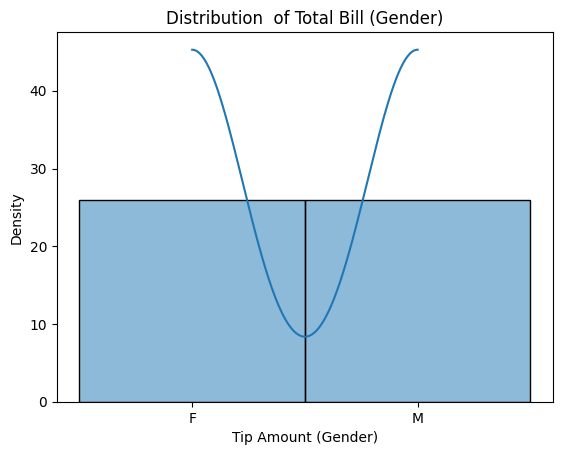

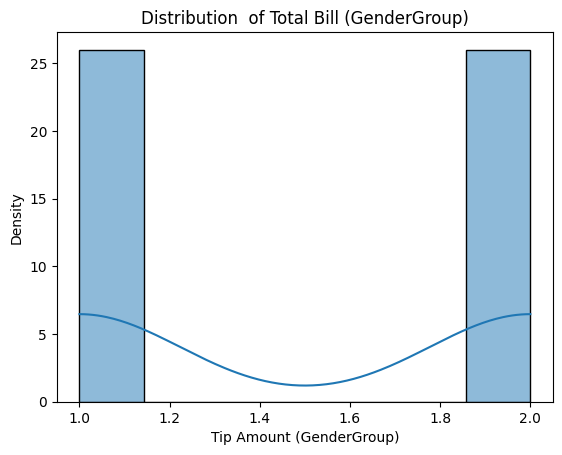

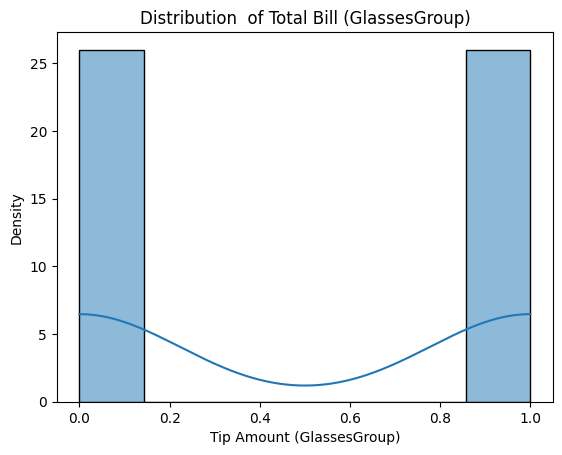

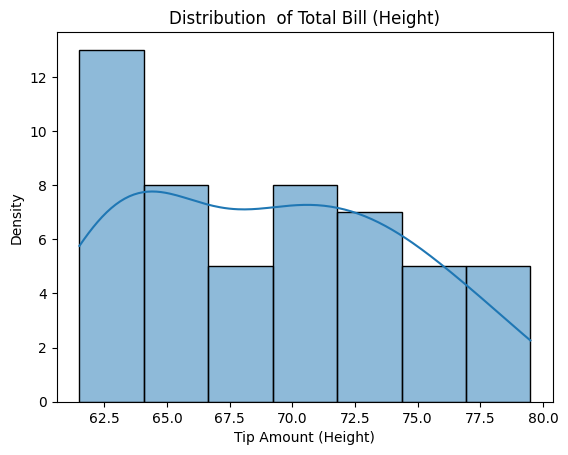

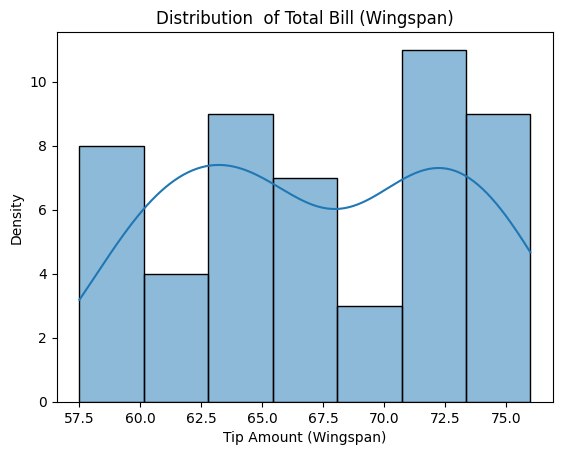

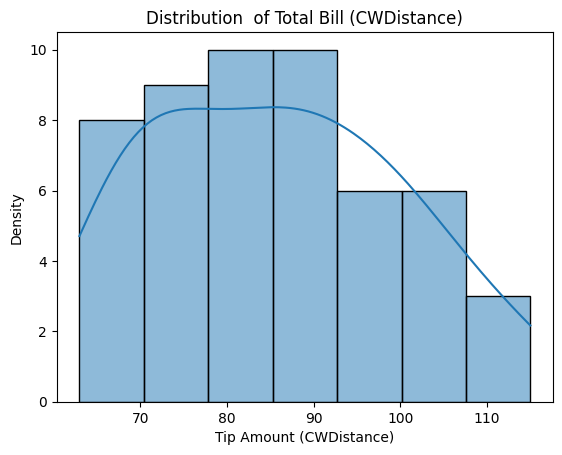

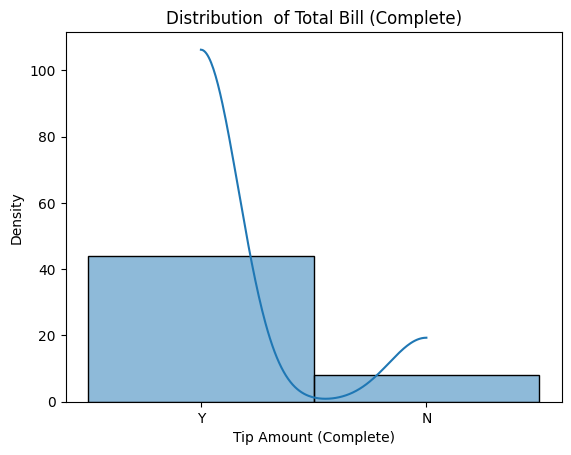

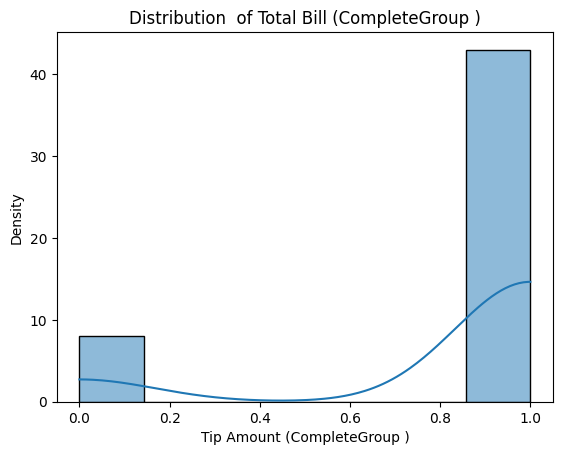

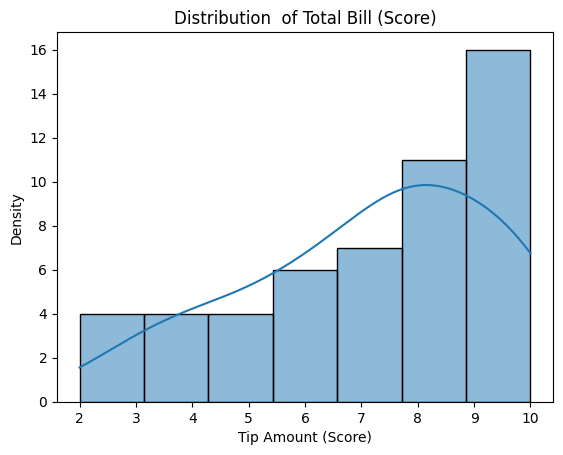

In [24]:
# Plot distribution of the tips only

sns.histplot(data=df, x="Age", kde=True)
plt.title("Distribution  of Total Bill (Age)")
plt.xlabel("Tip Amount (Age)")
plt.ylabel("Density")
plt.show()

sns.histplot(data=df, x="Gender", kde=True)
plt.title("Distribution  of Total Bill (Gender)")
plt.xlabel("Tip Amount (Gender)")
plt.ylabel("Density")
plt.show()

sns.histplot(data=df, x="GenderGroup", kde=True)
plt.title("Distribution  of Total Bill (GenderGroup)")
plt.xlabel("Tip Amount (GenderGroup)")
plt.ylabel("Density")
plt.show()

sns.histplot(data=df, x="GlassesGroup", kde=True)
plt.title("Distribution  of Total Bill (GlassesGroup)")
plt.xlabel("Tip Amount (GlassesGroup)")
plt.ylabel("Density")
plt.show()

sns.histplot(data=df, x="Height", kde=True)
plt.title("Distribution  of Total Bill (Height)")
plt.xlabel("Tip Amount (Height)")
plt.ylabel("Density")
plt.show()

sns.histplot(data=df, x="Wingspan", kde=True)
plt.title("Distribution  of Total Bill (Wingspan)")
plt.xlabel("Tip Amount (Wingspan)")
plt.ylabel("Density")
plt.show()

sns.histplot(data=df, x="CWDistance", kde=True)
plt.title("Distribution  of Total Bill (CWDistance)")
plt.xlabel("Tip Amount (CWDistance)")
plt.ylabel("Density")
plt.show()

sns.histplot(data=df, x="Complete", kde=True)
plt.title("Distribution  of Total Bill (Complete)")
plt.xlabel("Tip Amount (Complete)")
plt.ylabel("Density")
plt.show()

sns.histplot(data=df, x="CompleteGroup", kde=True)
plt.title("Distribution  of Total Bill (CompleteGroup )")
plt.xlabel("Tip Amount (CompleteGroup )")
plt.ylabel("Density")
plt.show()

sns.histplot(data=df, x="Score", kde=True)
plt.title("Distribution  of Total Bill (Score)")
plt.xlabel("Tip Amount (Score)")
plt.ylabel("Density")
plt.show()

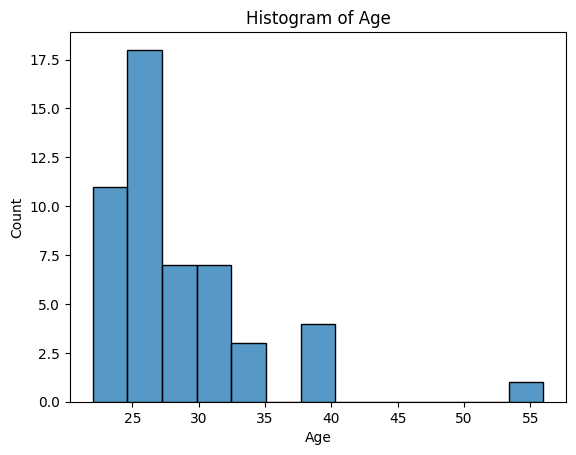

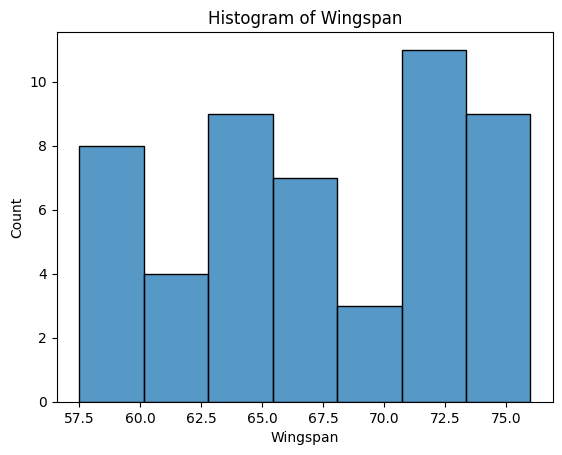

In [25]:
# Plot histogram of both the Age and the Wingspan

sns.histplot(data=df, x="Age")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

sns.histplot(data=df, x="Wingspan")
plt.title("Histogram of Wingspan")
plt.xlabel("Wingspan")
plt.ylabel("Count")
plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

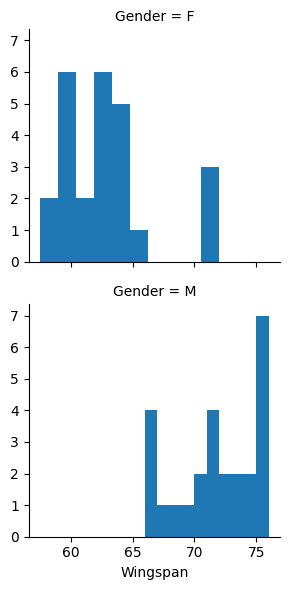

In [27]:
# Create histograms of the "Wingspan" grouped by "Gender"

h = sns.FacetGrid(df, row = "Gender")
h = h.map(plt.hist, "Wingspan")
plt.show()

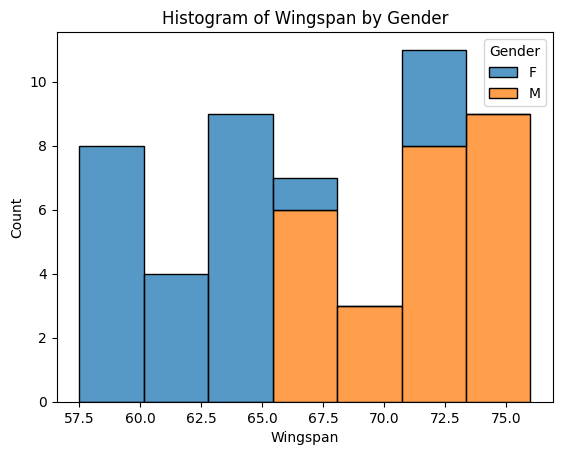

In [28]:
# Create histograms of the "Wingspan" grouped by "Gender"

sns.histplot(data=df, x="Wingspan", hue="Gender", multiple="stack")
plt.title("Histogram of Wingspan by Gender")
plt.xlabel("Wingspan")
plt.ylabel("Count")
plt.show()


# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

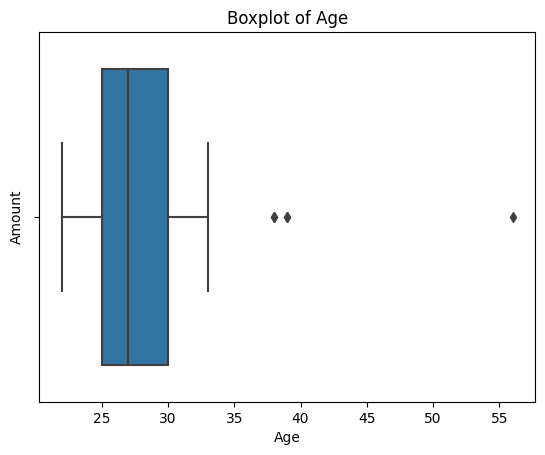

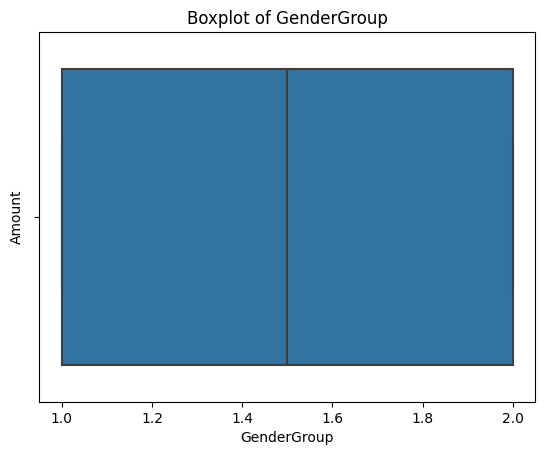

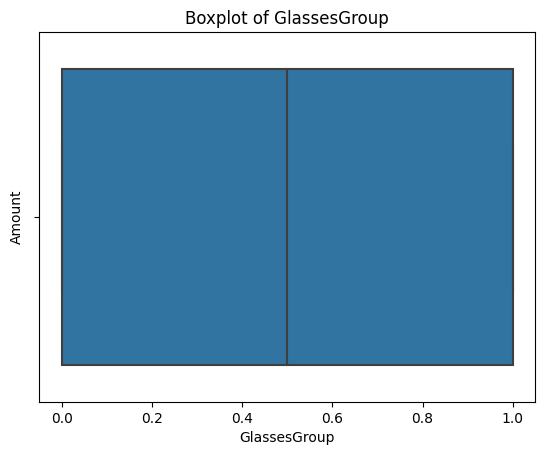

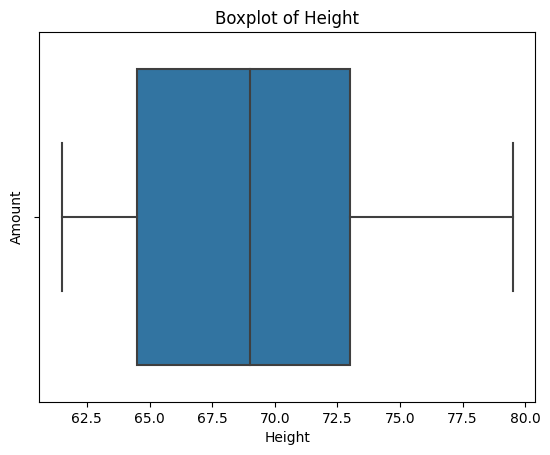

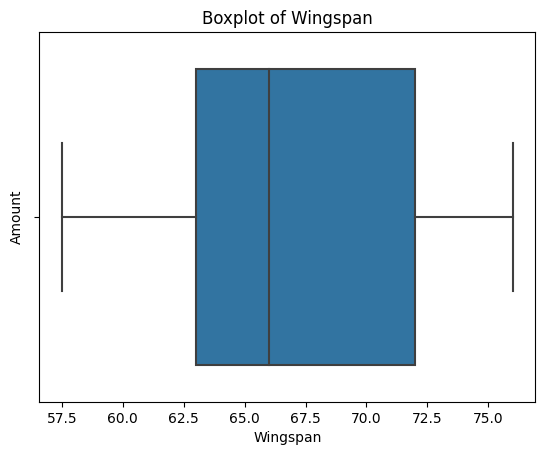

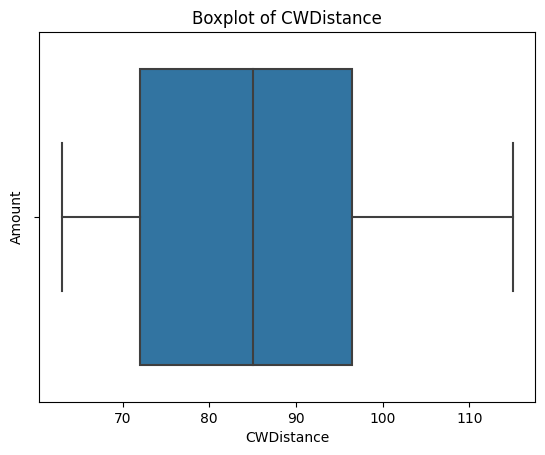

TypeError: Horizontal orientation requires numeric `x` variable.

In [37]:
# Create the boxplot of the "total bill" amounts

sns.boxplot(x=df["Age"])
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.show()

sns.boxplot(x=df["GenderGroup"])
plt.title("Boxplot of GenderGroup")
plt.xlabel("GenderGroup")
plt.ylabel("Amount")
plt.show()

sns.boxplot(x=df["GlassesGroup"])
plt.title("Boxplot of GlassesGroup")
plt.xlabel("GlassesGroup")
plt.ylabel("Amount")
plt.show()

sns.boxplot(x=df["Height"])
plt.title("Boxplot of Height")
plt.xlabel("Height")
plt.ylabel("Amount")
plt.show()

sns.boxplot(x=df["Wingspan"])
plt.title("Boxplot of Wingspan")
plt.xlabel("Wingspan")
plt.ylabel("Amount")
plt.show()

sns.boxplot(x=df["CWDistance"])
plt.title("Boxplot of CWDistance")
plt.xlabel("CWDistance")
plt.ylabel("Amount")
plt.show()

sns.boxplot(x=df["Complete"])
plt.title("Boxplot of Complete")
plt.xlabel("Complete")
plt.ylabel("Amount")
plt.show()

sns.boxplot(x=df["CompleteGroup "])
plt.title("Boxplot of CompleteGroup ")
plt.xlabel("CompleteGroup ")
plt.ylabel("Amount")
plt.show()

sns.boxplot(x=df["Score"])
plt.title("Boxplot of Score")
plt.xlabel("Score")
plt.ylabel("Amount")
plt.show()


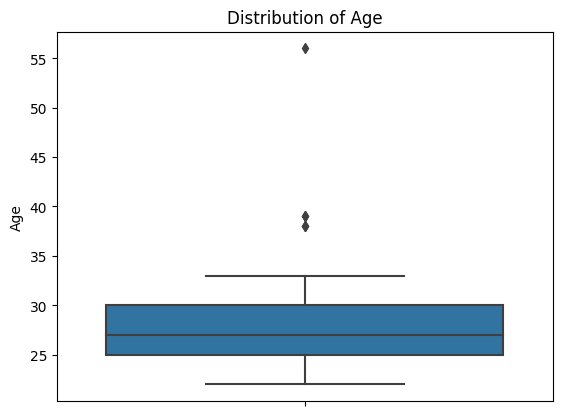

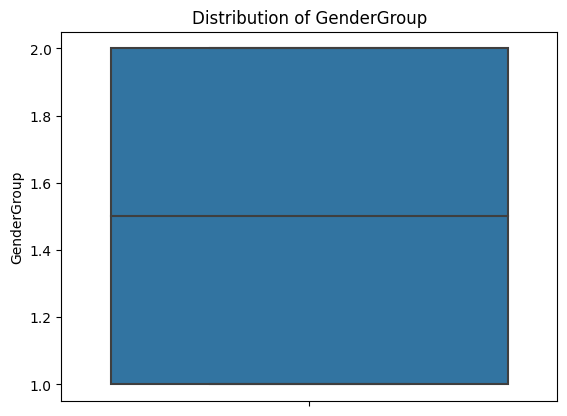

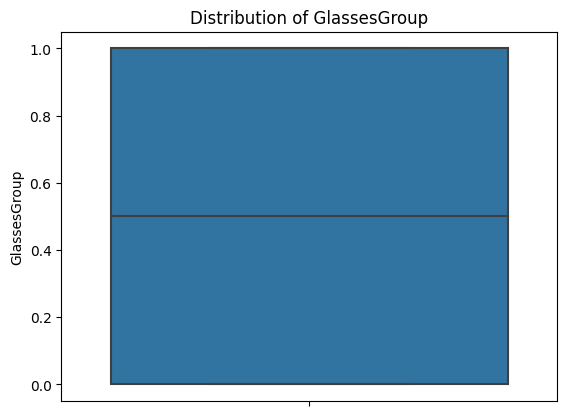

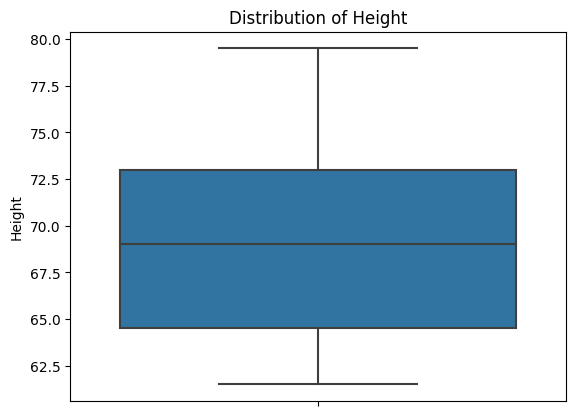

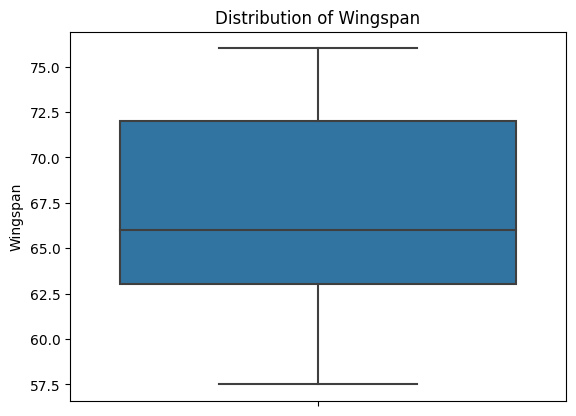

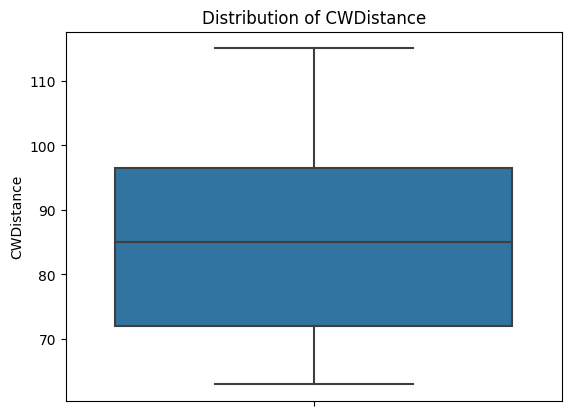

TypeError: Vertical orientation requires numeric `y` variable.

In [40]:
# Create the boxplot of the "tips" amounts

sns.boxplot(data=df, y='Age')
plt.ylabel('Age')
plt.title('Distribution of Age')
plt.show()

sns.boxplot(data=df, y='GenderGroup')
plt.ylabel('GenderGroup')
plt.title('Distribution of GenderGroup')
plt.show()

sns.boxplot(data=df, y='GlassesGroup')
plt.ylabel('GlassesGroup')
plt.title('Distribution of GlassesGroup')
plt.show()

sns.boxplot(data=df, y='Height')
plt.ylabel('Height')
plt.title('Distribution of Height')
plt.show()

sns.boxplot(data=df, y='Wingspan')
plt.ylabel('Wingspan')
plt.title('Distribution of Wingspan')
plt.show()

sns.boxplot(data=df, y='CWDistance')
plt.ylabel('CWDistance')
plt.title('Distribution of CWDistance')
plt.show()

sns.boxplot(data=df, y='Complete')
plt.ylabel('Complete')
plt.title('Distribution of Complete')
plt.show()

sns.boxplot(data=df, y='Age')
plt.ylabel('Age')
plt.title('Distribution of Age')
plt.show()

sns.boxplot(data=df, y='CompleteGroup ')
plt.ylabel('CompleteGroup ')
plt.title('Distribution of CompleteGroup ')
plt.show()

sns.boxplot(data=df, y='Score')
plt.ylabel('Score')
plt.title('Distribution of Score')
plt.show()

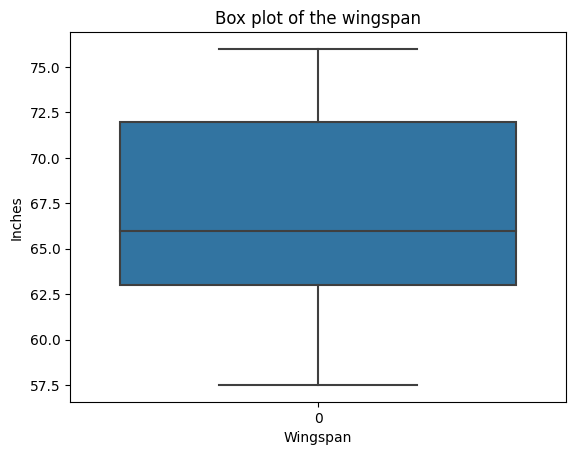

In [41]:
# Create the boxplot of the "Wingspan" amounts

sns.boxplot(df["Wingspan"]).set_title("Box plot of the wingspan")
plt.xlabel("Wingspan")
plt.ylabel("Inches")
plt.show()

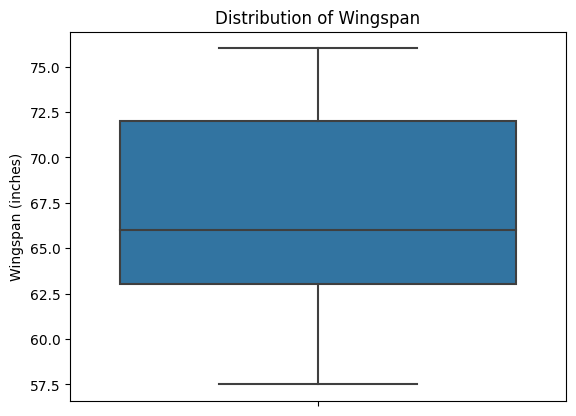

In [43]:
# Create the boxplot of the "Wingspan" amounts

sns.boxplot(data=df, y='Wingspan')
plt.ylabel('Wingspan (inches)')
plt.title('Distribution of Wingspan')
plt.show()

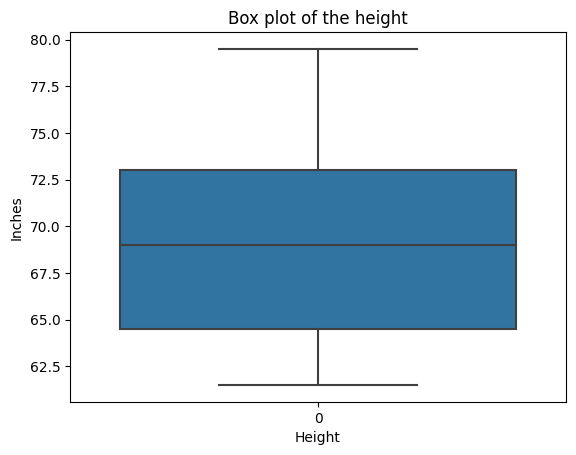

In [32]:
# Create the boxplot of the "Height" amounts

sns.boxplot(df["Height"]).set_title("Box plot of the height")
plt.xlabel("Height")
plt.ylabel("Inches")
plt.show()

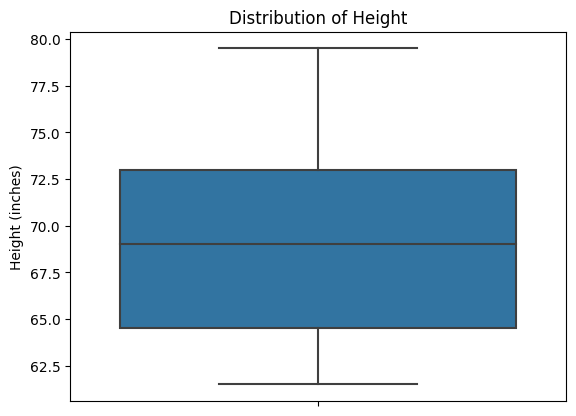

In [44]:
#Create the boxplot of the "Height" amounts

sns.boxplot(data=df, y='Height')
plt.ylabel('Height (inches)')
plt.title('Distribution of Height')
plt.show()

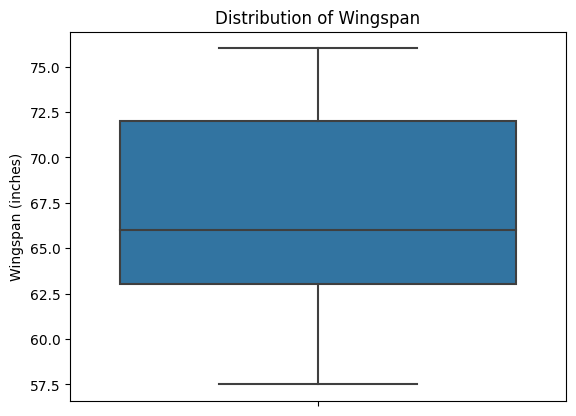

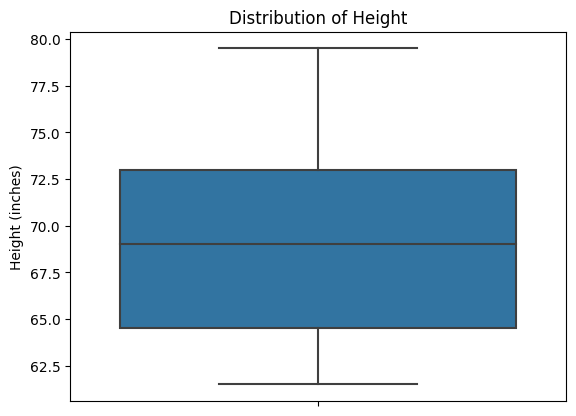

In [45]:
# Create the boxplots of the "Wingspan" and of the "Height" amounts

sns.boxplot(data=df, y='Wingspan')
plt.ylabel('Wingspan (inches)')
plt.title('Distribution of Wingspan')
plt.show()

sns.boxplot(data=df, y='Height')
plt.ylabel('Height (inches)')
plt.title('Distribution of Height')
plt.show()

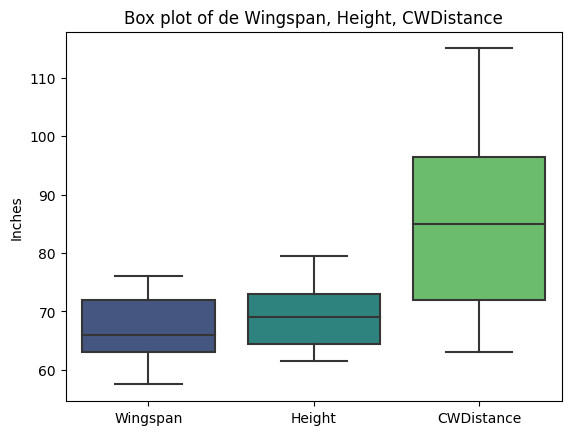

In [46]:
# Create the boxplots of the "Wingspan" and of the "tips" amounts

x = df.loc[:, ["Wingspan", "Height", "CWDistance"]]
x2bp = sns.boxplot(data=x, orient="v", palette="viridis")
x2bp.set_title("Box plot of de Wingspan, Height, CWDistance")
plt.ylabel("Inches")
plt.show()


In [ ]:
# Create the boxplots of the "Wingspan" and of the "tips" amounts



# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

In [ ]:
# Create side-by-side boxplots of the "Height" grouped by "Gender"



# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


In [ ]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"



# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

In [ ]:
# scatter plot between two variables



In [ ]:
# scatter plot between two variables (one categorical)



In [ ]:
# scatter plot between two variables (one categorical)



In [ ]:
# scatter plot between two variables grouped according to a categorical variable



In [ ]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers



# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables
